In [478]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from collections import OrderedDict
import os
font = {'family' : 'DejaVu Sans',
        'weight': 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

bar_codes = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#808585', '#9067a7',
             '#ab6857', '#ccc210']
line_codes = ['#396ab1', '#da7c30', '#3f9651', '#cc2529', '#535154', '#6b4c9a',
              '#922428', '#948b3d']
comp_codes = {'bzip2': 0,
              'deflate': 1,
              'lz4': 2,
              'lzf': 3,
              'lzma': 4,
              'lzo-1a': 5,
              'lzo1x-1': 6,
              'snappy': 7
             }

In [ ]:
cpu_lzf = pd.read_csv('../benchmarks/lzf.out', sep='|', header=None)
cpu_lzf.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']

In [ ]:
lzf_file = cpu_lzf.groupby('file').agg(['mean', 'std', 'min', 'max'])

In [ ]:
# drop first val, because of setup latency
cpu_lzf = cpu_lzf[1:]

In [ ]:
file_groups = cpu_lzf.groupby('file')

In [ ]:
# find stds for each group
stds = file_groups.aggregate(np.std)
stds = stds.replace(np.NaN, 0)

In [ ]:
# find mean values
means = file_groups.aggregate(np.mean)

In [ ]:
# find sample bounds
upper = means + (stds * 3)
lower = means - (stds * 3)

In [ ]:
orig_len = len(ecoli)
ecoli = file_groups.get_group('canterbury-large/E.coli')
compress_idx = [np.abs(ecoli.compress_us-ecoli.compress_us.mean())<= 3*ecoli.compress_us.std()]
decompress_idx = [np.abs( ecoli.decompress_us-ecoli.decompress_us.mean() )<= 3*ecoli.decompress_us.std()]
compress_decomp_idx = compress_idx and decompress_idx
in_std_len = len(ecoli[compress_decomp_idx[0]])
print('Removed {} of {} records, outside of 3 std dvs'.format(orig_len - in_std_len, orig_len))
f, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].bar(1, ecoli[compress_decomp_idx[0]]['compress_us'].mean())
axarr[1].bar(1, ecoli[compress_decomp_idx[0]]['decompress_us'].mean())

In [ ]:
ecoli.alg.iloc[0]

In [ ]:
len([c for c in compress_decomp_idx[0] if c])

In [ ]:
files = list(file_groups.groups.keys())


In [ ]:
CompressOut = namedtuple('CompressOut', 'path type')

In [ ]:
compress_outs = [
    CompressOut('../benchmarks/bzip.out', 'bzip'),
    CompressOut('../benchmarks/gzip.out', 'gzip'),
    CompressOut('../benchmarks/lz4.out', 'lz4'),
    CompressOut('../benchmarks/lzf.out', 'lzf'),
    CompressOut('../benchmarks/lzma.out', 'lzma'),
    CompressOut('../benchmarks/lzo.out', 'lzo'),
    CompressOut('../benchmarks/snappy.out', 'snappy')
]
frontend = [
    CompressOut('../benchmarks/lz4.out', 'lz4'),
    CompressOut('../benchmarks/lzf.out', 'lzf'),
    CompressOut('../benchmarks/lzo.out', 'lzo'),
]
backend = [
    CompressOut('../benchmarks/bzip.out', 'bzip'),
    CompressOut('../benchmarks/gzip.out', 'gzip'),
    CompressOut('../benchmarks/lzma.out', 'lzma'),
]

In [ ]:
compressed_dfs = [
    pd.read_csv(c.path, sep='|', header=None) for c in frontend
]

bzip2, ../dataset//canterbury-large/E.coli, Removed 2 of 1132 records
bzip2, ../dataset//canterbury-large/bible.txt, Removed 6 of 988 records
bzip2, ../dataset//canterbury-large/world192.txt, Removed 12 of 603 records
bzip2, ../dataset//canterbury/alice29.txt, Removed 1 of 37 records
bzip2, ../dataset//canterbury/asyoulik.txt, Removed 1 of 30 records
bzip2, ../dataset//canterbury/cp.html, Removed 0 of 6 records
bzip2, ../dataset//canterbury/fields.c, Removed 0 of 2 records
bzip2, ../dataset//canterbury/kennedy.xls, Removed 2 of 251 records
bzip2, ../dataset//canterbury/lcet10.txt, Removed 0 of 104 records
bzip2, ../dataset//canterbury/plrabn12.txt, Removed 1 of 117 records
bzip2, ../dataset//canterbury/ptt5, Removed 0 of 125 records
bzip2, ../dataset//canterbury/sum, Removed 0 of 9 records
bzip2, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
bzip2, ../dataset//silesia/dickens, Removed 5 of 2488 records
bzip2, ../dataset//silesia/mozilla, Removed 20 of 12505 records
bzip2, ../d

lzma, ../dataset//silesia/ooffice, Removed 13 of 1502 records
lzma, ../dataset//silesia/osdb, Removed 9 of 2462 records
lzma, ../dataset//silesia/reymont, Removed 32 of 1617 records
lzma, ../dataset//silesia/samba, Removed 121 of 5275 records
lzma, ../dataset//silesia/sao, Removed 5 of 1770 records
lzma, ../dataset//silesia/webster, Removed 36 of 10121 records
lzma, ../dataset//silesia/x-ray, Removed 17 of 2068 records
lzma, ../dataset//silesia/xml, Removed 0 of 1305 records
lzo-1a, ../dataset//canterbury-large/E.coli, Removed 4 of 1132 records
lzo-1a, ../dataset//canterbury-large/bible.txt, Removed 21 of 988 records
lzo-1a, ../dataset//canterbury-large/world192.txt, Removed 7 of 603 records
lzo-1a, ../dataset//canterbury/alice29.txt, Removed 0 of 37 records
lzo-1a, ../dataset//canterbury/asyoulik.txt, Removed 3 of 30 records
lzo-1a, ../dataset//canterbury/cp.html, Removed 0 of 6 records
lzo-1a, ../dataset//canterbury/fields.c, Removed 0 of 2 records
lzo-1a, ../dataset//canterbury/kenn

isal, ../dataset//canterbury/lcet10.txt, Removed 1 of 104 records
isal, ../dataset//canterbury/plrabn12.txt, Removed 1 of 117 records
isal, ../dataset//canterbury/ptt5, Removed 0 of 125 records
isal, ../dataset//canterbury/sum, Removed 0 of 9 records
isal, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
isal, ../dataset//silesia/dickens, Removed 55 of 2488 records
isal, ../dataset//silesia/mozilla, Removed 299 of 12505 records
isal, ../dataset//silesia/mr, Removed 17 of 2434 records
isal, ../dataset//silesia/nci, Removed 18 of 8191 records
isal, ../dataset//silesia/ooffice, Removed 22 of 1502 records
isal, ../dataset//silesia/osdb, Removed 34 of 2462 records
isal, ../dataset//silesia/reymont, Removed 28 of 1617 records
isal, ../dataset//silesia/samba, Removed 3 of 5275 records
isal, ../dataset//silesia/sao, Removed 31 of 1770 records
isal, ../dataset//silesia/webster, Removed 52 of 10121 records
isal, ../dataset//silesia/x-ray, Removed 53 of 2068 records
isal, ../dataset//silesi

lzo1x-1, ../dataset//silesia/x-ray, Removed 4 of 2068 records
lzo1x-1, ../dataset//silesia/xml, Removed 1 of 1305 records
snappy, ../dataset//canterbury-large/E.coli, Removed 1 of 1132 records
snappy, ../dataset//canterbury-large/bible.txt, Removed 22 of 988 records
snappy, ../dataset//canterbury-large/world192.txt, Removed 18 of 603 records
snappy, ../dataset//canterbury/alice29.txt, Removed 1 of 37 records
snappy, ../dataset//canterbury/asyoulik.txt, Removed 1 of 30 records
snappy, ../dataset//canterbury/cp.html, Removed 0 of 6 records
snappy, ../dataset//canterbury/fields.c, Removed 0 of 2 records
snappy, ../dataset//canterbury/kennedy.xls, Removed 6 of 251 records
snappy, ../dataset//canterbury/lcet10.txt, Removed 3 of 104 records
snappy, ../dataset//canterbury/plrabn12.txt, Removed 1 of 117 records
snappy, ../dataset//canterbury/ptt5, Removed 1 of 125 records
snappy, ../dataset//canterbury/sum, Removed 0 of 9 records
snappy, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
s

lzf, ../dataset//canterbury/plrabn12.txt, Removed 1 of 117 records
lzf, ../dataset//canterbury/ptt5, Removed 1 of 125 records
lzf, ../dataset//canterbury/sum, Removed 0 of 9 records
lzf, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
lzf, ../dataset//silesia/dickens, Removed 6 of 2488 records
lzf, ../dataset//silesia/mozilla, Removed 15 of 12505 records
lzf, ../dataset//silesia/mr, Removed 22 of 2434 records
lzf, ../dataset//silesia/nci, Removed 37 of 8191 records
lzf, ../dataset//silesia/ooffice, Removed 1 of 1502 records
lzf, ../dataset//silesia/osdb, Removed 44 of 2462 records
lzf, ../dataset//silesia/reymont, Removed 38 of 1617 records
lzf, ../dataset//silesia/samba, Removed 11 of 5275 records
lzf, ../dataset//silesia/sao, Removed 29 of 1770 records
lzf, ../dataset//silesia/webster, Removed 13 of 10121 records
lzf, ../dataset//silesia/x-ray, Removed 119 of 2068 records
lzf, ../dataset//silesia/xml, Removed 7 of 1305 records
lzma, ../dataset//canterbury-large/E.coli, Removed

deflate, ../dataset//canterbury/asyoulik.txt, Removed 1 of 30 records
deflate, ../dataset//canterbury/cp.html, Removed 0 of 6 records
deflate, ../dataset//canterbury/fields.c, Removed 0 of 2 records
deflate, ../dataset//canterbury/kennedy.xls, Removed 3 of 251 records
deflate, ../dataset//canterbury/lcet10.txt, Removed 2 of 104 records
deflate, ../dataset//canterbury/plrabn12.txt, Removed 0 of 117 records
deflate, ../dataset//canterbury/ptt5, Removed 0 of 125 records
deflate, ../dataset//canterbury/sum, Removed 0 of 9 records
deflate, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
deflate, ../dataset//silesia/dickens, Removed 54 of 2488 records
deflate, ../dataset//silesia/mozilla, Removed 10 of 12505 records
deflate, ../dataset//silesia/mr, Removed 19 of 2434 records
deflate, ../dataset//silesia/nci, Removed 29 of 8191 records
deflate, ../dataset//silesia/ooffice, Removed 2 of 1502 records
deflate, ../dataset//silesia/osdb, Removed 4 of 2462 records
deflate, ../dataset//silesi

lzo-1a, ../dataset//silesia/mozilla, Removed 10 of 12505 records
lzo-1a, ../dataset//silesia/mr, Removed 1 of 2434 records
lzo-1a, ../dataset//silesia/nci, Removed 7 of 8191 records
lzo-1a, ../dataset//silesia/ooffice, Removed 33 of 1502 records
lzo-1a, ../dataset//silesia/osdb, Removed 1 of 2462 records
lzo-1a, ../dataset//silesia/reymont, Removed 35 of 1617 records
lzo-1a, ../dataset//silesia/samba, Removed 2 of 5275 records
lzo-1a, ../dataset//silesia/sao, Removed 5 of 1770 records
lzo-1a, ../dataset//silesia/webster, Removed 6 of 10121 records
lzo-1a, ../dataset//silesia/x-ray, Removed 9 of 2068 records
lzo-1a, ../dataset//silesia/xml, Removed 6 of 1305 records
lzo1x-1, ../dataset//canterbury-large/E.coli, Removed 7 of 1132 records
lzo1x-1, ../dataset//canterbury-large/bible.txt, Removed 6 of 988 records
lzo1x-1, ../dataset//canterbury-large/world192.txt, Removed 13 of 603 records
lzo1x-1, ../dataset//canterbury/alice29.txt, Removed 0 of 37 records
lzo1x-1, ../dataset//canterbury/a

lz4, ../dataset//canterbury/plrabn12.txt, Removed 0 of 117 records
lz4, ../dataset//canterbury/ptt5, Removed 0 of 125 records
lz4, ../dataset//canterbury/sum, Removed 0 of 9 records
lz4, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
lz4, ../dataset//silesia/dickens, Removed 6 of 2488 records
lz4, ../dataset//silesia/mozilla, Removed 49 of 12505 records
lz4, ../dataset//silesia/mr, Removed 6 of 2434 records
lz4, ../dataset//silesia/nci, Removed 43 of 8191 records
lz4, ../dataset//silesia/ooffice, Removed 12 of 1502 records
lz4, ../dataset//silesia/osdb, Removed 17 of 2462 records
lz4, ../dataset//silesia/reymont, Removed 2 of 1617 records
lz4, ../dataset//silesia/samba, Removed 2 of 5275 records
lz4, ../dataset//silesia/sao, Removed 11 of 1770 records
lz4, ../dataset//silesia/webster, Removed 12 of 10121 records
lz4, ../dataset//silesia/x-ray, Removed 0 of 2068 records
lz4, ../dataset//silesia/xml, Removed 1 of 1305 records
lzf, ../dataset//canterbury-large/E.coli, Removed 4 of

snappy, ../dataset//silesia/nci, Removed 86 of 8191 records
snappy, ../dataset//silesia/ooffice, Removed 31 of 1502 records
snappy, ../dataset//silesia/osdb, Removed 22 of 2462 records
snappy, ../dataset//silesia/reymont, Removed 14 of 1617 records
snappy, ../dataset//silesia/samba, Removed 12 of 5275 records
snappy, ../dataset//silesia/sao, Removed 12 of 1770 records
snappy, ../dataset//silesia/webster, Removed 11 of 10121 records
snappy, ../dataset//silesia/x-ray, Removed 18 of 2068 records
snappy, ../dataset//silesia/xml, Removed 10 of 1305 records
bzip2, ../dataset//canterbury-large/E.coli, Removed 9 of 1132 records
bzip2, ../dataset//canterbury-large/bible.txt, Removed 18 of 988 records
bzip2, ../dataset//canterbury-large/world192.txt, Removed 18 of 603 records
bzip2, ../dataset//canterbury/alice29.txt, Removed 1 of 37 records
bzip2, ../dataset//canterbury/asyoulik.txt, Removed 1 of 30 records
bzip2, ../dataset//canterbury/cp.html, Removed 0 of 6 records
bzip2, ../dataset//canterb

lzma, ../dataset//canterbury/sum, Removed 0 of 9 records
lzma, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
lzma, ../dataset//silesia/dickens, Removed 12 of 2488 records
lzma, ../dataset//silesia/mozilla, Removed 121 of 12505 records
lzma, ../dataset//silesia/mr, Removed 61 of 2434 records
lzma, ../dataset//silesia/nci, Removed 25 of 8191 records
lzma, ../dataset//silesia/ooffice, Removed 14 of 1502 records
lzma, ../dataset//silesia/osdb, Removed 44 of 2462 records
lzma, ../dataset//silesia/reymont, Removed 24 of 1617 records
lzma, ../dataset//silesia/samba, Removed 117 of 5275 records
lzma, ../dataset//silesia/sao, Removed 4 of 1770 records
lzma, ../dataset//silesia/webster, Removed 80 of 10121 records
lzma, ../dataset//silesia/x-ray, Removed 26 of 2068 records
lzma, ../dataset//silesia/xml, Removed 3 of 1305 records
lzo-1a, ../dataset//canterbury-large/E.coli, Removed 13 of 1132 records
lzo-1a, ../dataset//canterbury-large/bible.txt, Removed 12 of 988 records
lzo-1a, ../dat

isal, ../dataset//canterbury-large/bible.txt, Removed 14 of 988 records
isal, ../dataset//canterbury-large/world192.txt, Removed 3 of 603 records
isal, ../dataset//canterbury/alice29.txt, Removed 1 of 37 records
isal, ../dataset//canterbury/asyoulik.txt, Removed 0 of 30 records
isal, ../dataset//canterbury/cp.html, Removed 0 of 6 records
isal, ../dataset//canterbury/fields.c, Removed 0 of 2 records
isal, ../dataset//canterbury/kennedy.xls, Removed 5 of 251 records
isal, ../dataset//canterbury/lcet10.txt, Removed 0 of 104 records
isal, ../dataset//canterbury/plrabn12.txt, Removed 0 of 117 records
isal, ../dataset//canterbury/ptt5, Removed 0 of 125 records
isal, ../dataset//canterbury/sum, Removed 0 of 9 records
isal, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
isal, ../dataset//silesia/dickens, Removed 52 of 2488 records
isal, ../dataset//silesia/mozilla, Removed 10 of 12505 records
isal, ../dataset//silesia/mr, Removed 2 of 2434 records
isal, ../dataset//silesia/nci, Removed

snappy, ../dataset//canterbury-large/world192.txt, Removed 14 of 603 records
snappy, ../dataset//canterbury/alice29.txt, Removed 0 of 37 records
snappy, ../dataset//canterbury/asyoulik.txt, Removed 1 of 30 records
snappy, ../dataset//canterbury/cp.html, Removed 0 of 6 records
snappy, ../dataset//canterbury/fields.c, Removed 0 of 2 records
snappy, ../dataset//canterbury/kennedy.xls, Removed 5 of 251 records
snappy, ../dataset//canterbury/lcet10.txt, Removed 6 of 104 records
snappy, ../dataset//canterbury/plrabn12.txt, Removed 2 of 117 records
snappy, ../dataset//canterbury/ptt5, Removed 1 of 125 records
snappy, ../dataset//canterbury/sum, Removed 0 of 9 records
snappy, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
snappy, ../dataset//silesia/dickens, Removed 6 of 2488 records
snappy, ../dataset//silesia/mozilla, Removed 31 of 12505 records
snappy, ../dataset//silesia/mr, Removed 4 of 2434 records
snappy, ../dataset//silesia/nci, Removed 21 of 8191 records
snappy, ../dataset//si

lzf, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
lzf, ../dataset//silesia/dickens, Removed 10 of 2488 records
lzf, ../dataset//silesia/mozilla, Removed 10 of 12505 records
lzf, ../dataset//silesia/mr, Removed 22 of 2434 records
lzf, ../dataset//silesia/nci, Removed 12 of 8191 records
lzf, ../dataset//silesia/ooffice, Removed 25 of 1502 records
lzf, ../dataset//silesia/osdb, Removed 23 of 2462 records
lzf, ../dataset//silesia/reymont, Removed 34 of 1617 records
lzf, ../dataset//silesia/samba, Removed 7 of 5275 records
lzf, ../dataset//silesia/sao, Removed 4 of 1770 records
lzf, ../dataset//silesia/webster, Removed 17 of 10121 records
lzf, ../dataset//silesia/x-ray, Removed 119 of 2068 records
lzf, ../dataset//silesia/xml, Removed 3 of 1305 records
lzma, ../dataset//canterbury-large/E.coli, Removed 2 of 1132 records
lzma, ../dataset//canterbury-large/bible.txt, Removed 6 of 988 records
lzma, ../dataset//canterbury-large/world192.txt, Removed 12 of 603 records
lzma, ../dataset/

deflate, ../dataset//canterbury-large/bible.txt, Removed 4 of 988 records
deflate, ../dataset//canterbury-large/world192.txt, Removed 1 of 603 records
deflate, ../dataset//canterbury/alice29.txt, Removed 1 of 37 records
deflate, ../dataset//canterbury/asyoulik.txt, Removed 0 of 30 records
deflate, ../dataset//canterbury/cp.html, Removed 0 of 6 records
deflate, ../dataset//canterbury/fields.c, Removed 0 of 2 records
deflate, ../dataset//canterbury/kennedy.xls, Removed 8 of 251 records
deflate, ../dataset//canterbury/lcet10.txt, Removed 2 of 104 records
deflate, ../dataset//canterbury/plrabn12.txt, Removed 1 of 117 records
deflate, ../dataset//canterbury/ptt5, Removed 0 of 125 records
deflate, ../dataset//canterbury/sum, Removed 0 of 9 records
deflate, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
deflate, ../dataset//silesia/dickens, Removed 4 of 2488 records
deflate, ../dataset//silesia/mozilla, Removed 8 of 12505 records
deflate, ../dataset//silesia/mr, Removed 2 of 2434 reco

lzo-1a, ../dataset//canterbury/plrabn12.txt, Removed 3 of 117 records
lzo-1a, ../dataset//canterbury/ptt5, Removed 0 of 125 records
lzo-1a, ../dataset//canterbury/sum, Removed 0 of 9 records
lzo-1a, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
lzo-1a, ../dataset//silesia/dickens, Removed 10 of 2488 records
lzo-1a, ../dataset//silesia/mozilla, Removed 8 of 12505 records
lzo-1a, ../dataset//silesia/mr, Removed 38 of 2434 records
lzo-1a, ../dataset//silesia/nci, Removed 34 of 8191 records
lzo-1a, ../dataset//silesia/ooffice, Removed 2 of 1502 records
lzo-1a, ../dataset//silesia/osdb, Removed 35 of 2462 records
lzo-1a, ../dataset//silesia/reymont, Removed 2 of 1617 records
lzo-1a, ../dataset//silesia/samba, Removed 1 of 5275 records
lzo-1a, ../dataset//silesia/sao, Removed 3 of 1770 records
lzo-1a, ../dataset//silesia/webster, Removed 7 of 10121 records
lzo-1a, ../dataset//silesia/x-ray, Removed 2 of 2068 records
lzo-1a, ../dataset//silesia/xml, Removed 3 of 1305 records
lzo1x-1,

lz4, ../dataset//canterbury/asyoulik.txt, Removed 0 of 30 records
lz4, ../dataset//canterbury/cp.html, Removed 0 of 6 records
lz4, ../dataset//canterbury/fields.c, Removed 0 of 2 records
lz4, ../dataset//canterbury/kennedy.xls, Removed 0 of 251 records
lz4, ../dataset//canterbury/lcet10.txt, Removed 0 of 104 records
lz4, ../dataset//canterbury/plrabn12.txt, Removed 1 of 117 records
lz4, ../dataset//canterbury/ptt5, Removed 1 of 125 records
lz4, ../dataset//canterbury/sum, Removed 0 of 9 records
lz4, ../dataset//canterbury/xargs.1, Removed 0 of 1 records
lz4, ../dataset//silesia/dickens, Removed 3 of 2488 records
lz4, ../dataset//silesia/mozilla, Removed 31 of 12505 records
lz4, ../dataset//silesia/mr, Removed 5 of 2434 records
lz4, ../dataset//silesia/nci, Removed 6 of 8191 records
lz4, ../dataset//silesia/ooffice, Removed 15 of 1502 records
lz4, ../dataset//silesia/osdb, Removed 4 of 2462 records
lz4, ../dataset//silesia/reymont, Removed 2 of 1617 records
lz4, ../dataset//silesia/samb

snappy, ../dataset//silesia/mr, Removed 0 of 2434 records
snappy, ../dataset//silesia/nci, Removed 10 of 8191 records
snappy, ../dataset//silesia/ooffice, Removed 29 of 1502 records
snappy, ../dataset//silesia/osdb, Removed 20 of 2462 records
snappy, ../dataset//silesia/reymont, Removed 62 of 1617 records
snappy, ../dataset//silesia/samba, Removed 30 of 5275 records
snappy, ../dataset//silesia/sao, Removed 7 of 1770 records
snappy, ../dataset//silesia/webster, Removed 23 of 10121 records
snappy, ../dataset//silesia/x-ray, Removed 17 of 2068 records
snappy, ../dataset//silesia/xml, Removed 10 of 1305 records


IndexError: index 25 is out of bounds for axis 0 with size 25

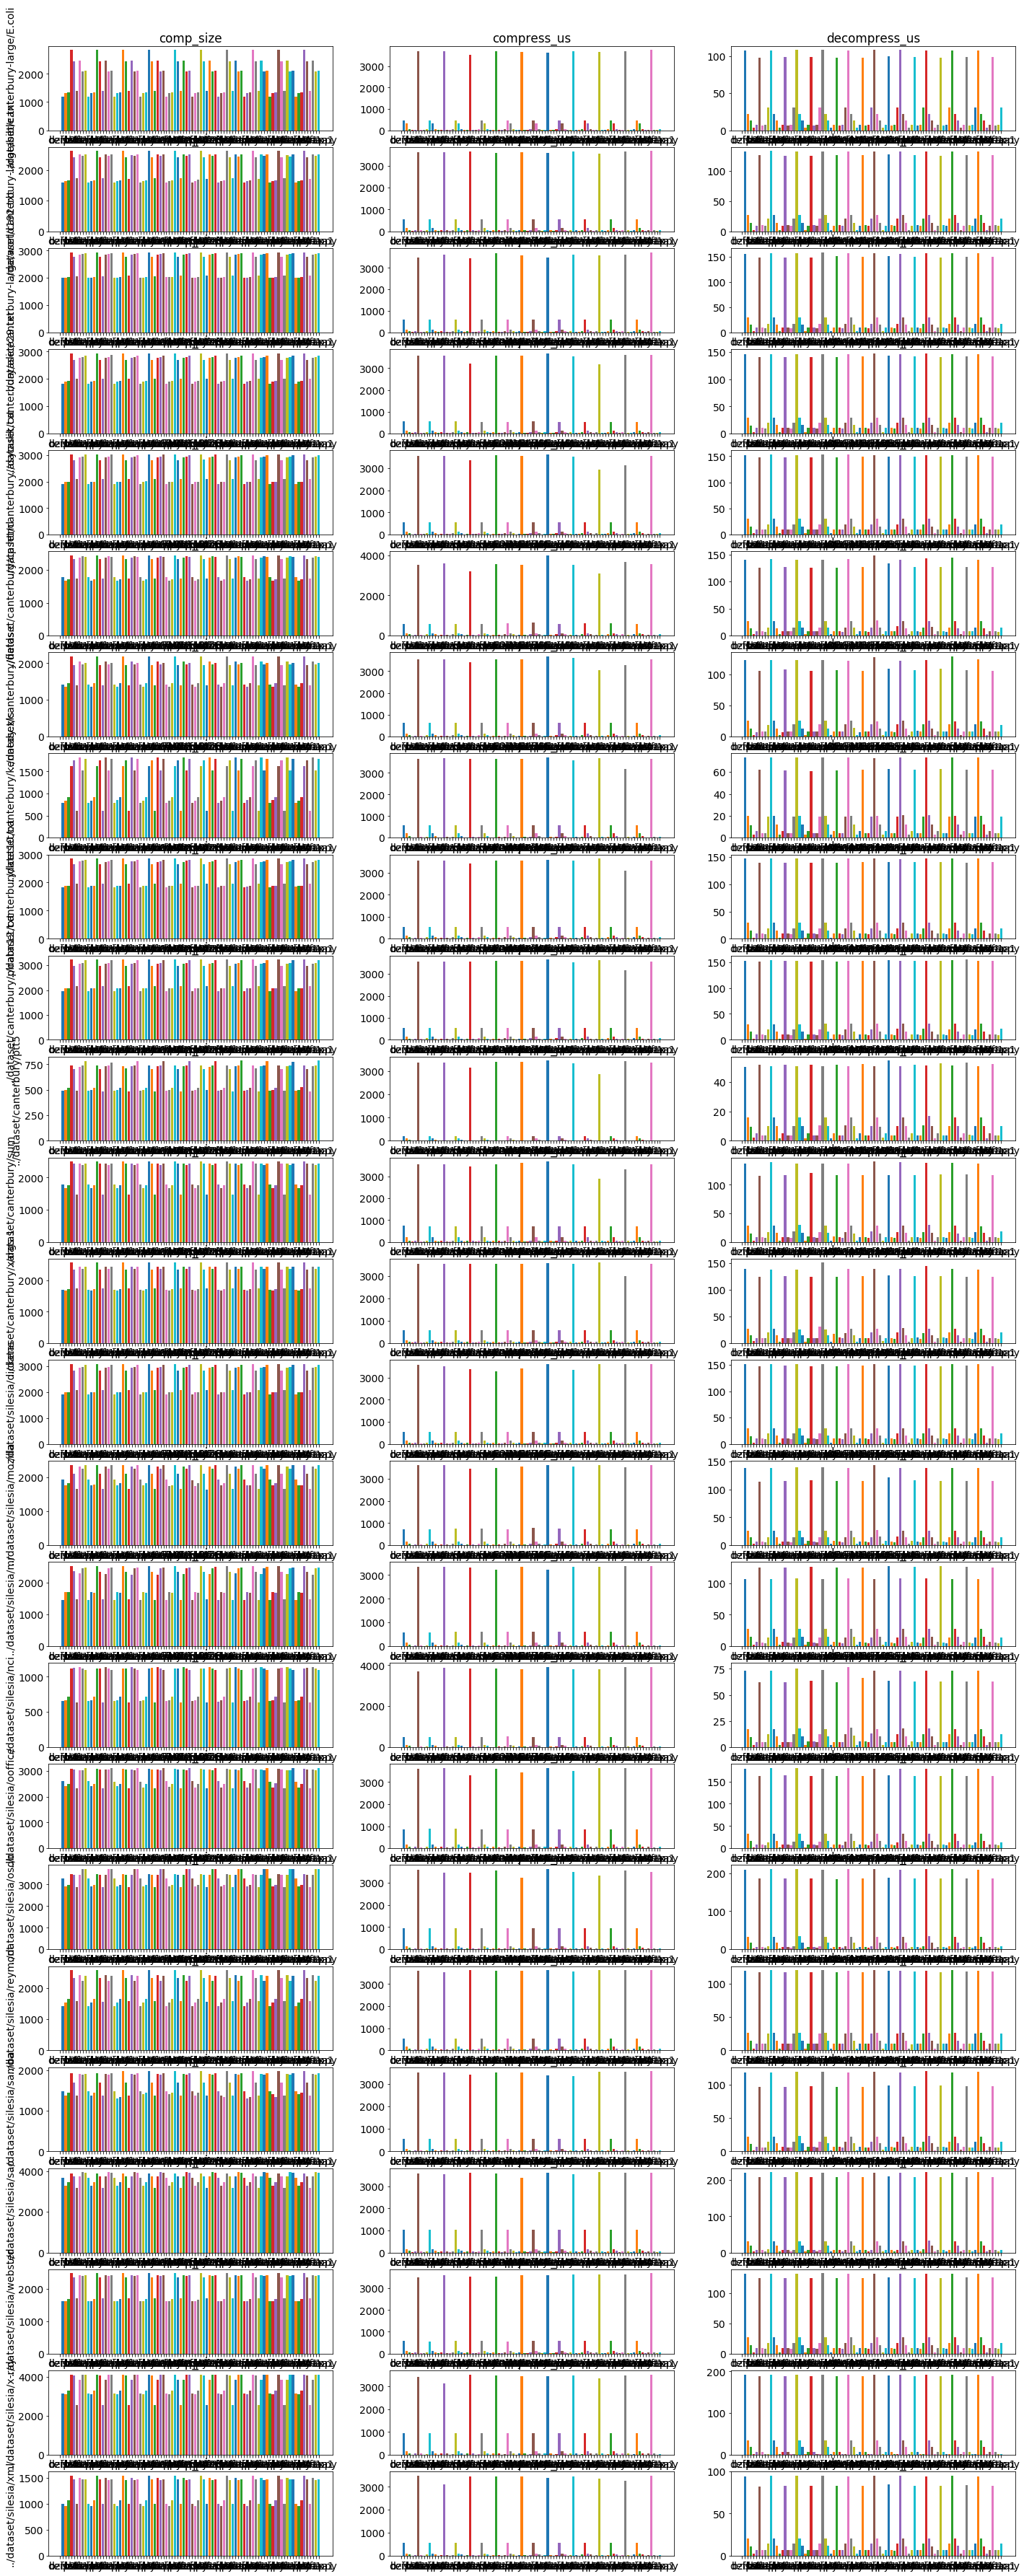

In [433]:
fig, axarr = plt.subplots(25, 3, figsize=(24, 64))
metrics = ['comp_size', 'compress_us', 'decompress_us']
i = 1
algs = []
file_names = None
for c_df in compressed_dfs:
    c_df.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']
    c_df = c_df.groupby(('alg','file'))
    
    if not file_names:
        file_names = [f[1].replace('//', '/') for f in list(c_df.groups.keys())]

    files = list(c_df.groups.keys())
    
    #assert [f.replace('//', '/') for f[1] in files] == file_names
    
    algs_in_df = dict()
    for f in range(len(files)):
        alg = files[f][0]
        if alg not in algs_in_df:
            algs.append(alg)
            algs_in_df[alg] =  i
            i += 1
            
        file_df = c_df.get_group(files[f])
        file_df_len = len(file_df)
        if file_df_len > 1:
            compress_idx = [
                np.abs(file_df.compress_us-file_df.compress_us.mean())<= 3*file_df.compress_us.std()]
            decompress_idx = [
                np.abs(file_df.decompress_us-file_df.decompress_us.mean())<= 3*file_df.decompress_us.std()]
            comp_and_decomp = compress_idx and decompress_idx
        else:
            # quick and dirty way to handle the 1 block example
            comp_and_decomp = [[True]]
        comp_and_decomp_len = len([c for c in comp_and_decomp[0] if c])
        print('{}, {}, Removed {} of {} records'.format(file_df.alg.iloc[0], file_df.file.iloc[0],
                                                        file_df_len - comp_and_decomp_len, file_df_len))
        for m in range(len(metrics)):
            axarr[f % 25, m].bar(algs_in_df[alg], file_df[comp_and_decomp[0]][metrics[m]].mean())
                   
for f in range(len(file_names)):
    axarr[f, 0].set_ylabel(file_names[f])
    for m in range(len(metrics)):
        axarr[f, m].set_title(metrics[m])
        axarr[f, m].set_xticks(range(len(algs) + 1))
        axarr[f, m].set_xticklabels([''] + algs, minor=False)
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.4)
plt.show()
#plt.savefig('compression_algorithms_frontend_by_file.png')

In [318]:
alg_groups = {
    "frontend" : [
        CompressOut('../benchmarks/lz4.out', 'lz4'),
        CompressOut('../benchmarks/lzf.out', 'lzf'),
        CompressOut('../benchmarks/lzo.out', 'lzo')
    ],
    "backend": [
        CompressOut('../benchmarks/bzip.out', 'bzip'),
        CompressOut('../benchmarks/gzip.out', 'gzip'),
        CompressOut('../benchmarks/lzma.out', 'lzma')
    ]
}

In [434]:
alg_group = 'frontend'
chart = 'bar'

compressed_dfs = [
    pd.read_csv(c.path, sep='|', header=None) for c in alg_groups[alg_group]
]

fig, axarr = plt.subplots(1, 3, figsize=(13, 4))
metrics = ['comp_size', 'compress_us', 'decompress_us']
i = 1
algs = []
file_names = None
for c_df in compressed_dfs:
    c_df.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']
    c_df = c_df.groupby('alg')
    
    algs_in_df = dict()
    
    for alg in list(c_df.groups.keys()):
        if alg not in algs_in_df:
            algs.append(alg)
            algs_in_df[alg] =  i
            i += 1
            
        alg_df = c_df.get_group(alg)
        alg_df_len = len(alg_df)
        if alg_df_len > 1:
            compress_idx = [
                np.abs(alg_df.compress_us-alg_df.compress_us.mean())<= 3*alg_df.compress_us.std()]
            decompress_idx = [
                np.abs(alg_df.decompress_us-alg_df.decompress_us.mean())<= 3*alg_df.decompress_us.std()]
            comp_and_decomp = compress_idx and decompress_idx
        else:
            # quick and dirty way to handle the 1 block example
            comp_and_decomp = [[True]]
        comp_and_decomp_len = len([c for c in comp_and_decomp[0] if c])
        print('{}, {}, Removed {} of {} records'.format(alg_df.alg.iloc[0], alg_df.file.iloc[0],
                                                        alg_df_len - comp_and_decomp_len, alg_df_len))
        for m in range(len(metrics)):
            if chart == 'bar':
                axarr[m].bar(algs_in_df[alg], alg_df[comp_and_decomp[0]][metrics[m]].mean(),
                             color=bar_codes[comp_codes[alg]])
            elif chart == 'hist':
                axarr[m].hist(alg_df[comp_and_decomp[0]][metrics[m]],
                             color=bar_codes[comp_codes[alg]], alpha=0.8)
                
for m in range(len(metrics)):
    axarr[m].set_title(metrics[m], fontsize=16)
    if chart == 'bar':
        axarr[m].set_xticks(range(len(algs) + 1))
        axarr[m].set_xticklabels([''] + algs, minor=False)
    if m == 0:
        axarr[m].set_ylabel('bytes')
    else:
        axarr[m].set_ylabel('microseconds')
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.5, wspace=0.4)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("{} Compression Algorithms".format(alg_group.capitalize()), weight='bold', size=16)

if chart == 'hist':
    fig.legend(algs, loc='lower center', ncol=len(algs),  borderaxespad=0.2)

plt.show()
#plt.savefig('compression_algorithms_{}.png'.format(alg_group))

FileNotFoundError: File b'../benchmarks/lz4.out' does not exist

# Frontend Hist by alg

lz4, canterbury/alice29.txt, Removed 13 of 55143 records
lzf, canterbury/alice29.txt, Removed 81 of 55143 records
lzo-1a, canterbury/alice29.txt, Removed 478 of 55143 records
lzo1x-1, canterbury/alice29.txt, Removed 53 of 55143 records


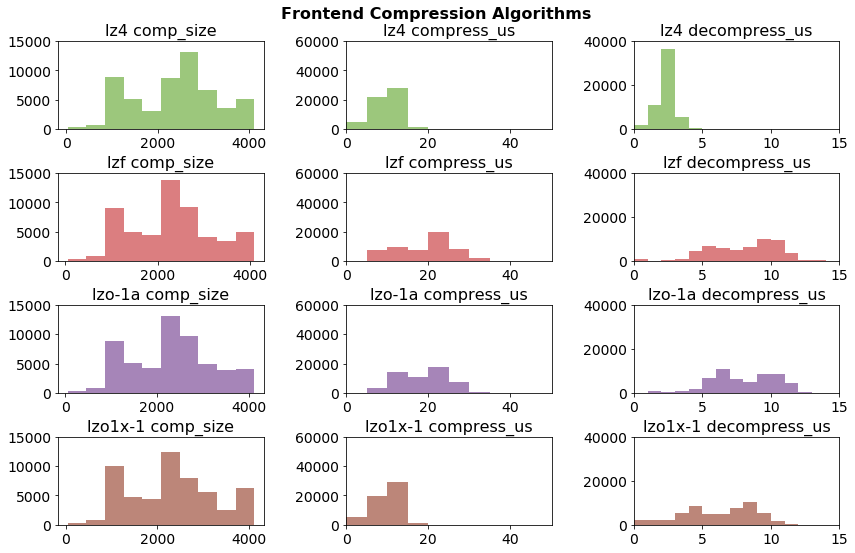

In [387]:
alg_group = 'frontend'
chart = 'hist'

compressed_dfs = [
    pd.read_csv(c.path, sep='|', header=None) for c in alg_groups[alg_group]
]

fig, axarr = plt.subplots(len(compressed_dfs) + 1, 3, figsize=(14, 8))
metrics = ['comp_size', 'compress_us', 'decompress_us']
i = 0
algs = []
file_names = None
comp_x = range(50)
decomp_x = range(15)
bin_ranges = [None, range(0, 50, 5), range(0, 15, 1)]

decomp_limit = 0
for c_df in compressed_dfs:
    c_df.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']
    c_df = c_df.groupby('alg')
    
    algs_in_df = dict()
    
    for alg in list(c_df.groups.keys()):
        if alg not in algs_in_df:
            algs.append(alg)
            algs_in_df[alg] =  i
            i += 1
            
        alg_df = c_df.get_group(alg)
        alg_df_len = len(alg_df)
        if alg_df_len > 1:
            compress_idx = [
                np.abs(alg_df.compress_us-alg_df.compress_us.mean())<= 3*alg_df.compress_us.std()]
            decompress_idx = [
                np.abs(alg_df.decompress_us-alg_df.decompress_us.mean())<= 3*alg_df.decompress_us.std()]
            comp_and_decomp = compress_idx and decompress_idx
        else:
            # quick and dirty way to handle the 1 block example
            comp_and_decomp = [[True]]
        comp_and_decomp_len = len([c for c in comp_and_decomp[0] if c])
        print('{}, {}, Removed {} of {} records'.format(alg_df.alg.iloc[0], alg_df.file.iloc[0],
                                                        alg_df_len - comp_and_decomp_len, alg_df_len))
        for m in range(len(metrics)):
            if chart == 'bar':
                axarr[i, m].bar(algs_in_df[alg], alg_df[comp_and_decomp[0]][metrics[m]].mean(),
                             color=bar_codes[comp_codes[alg]])
            elif chart == 'hist':
                axarr[algs_in_df[alg], m].hist(alg_df[comp_and_decomp[0]][metrics[m]],
                      color=bar_codes[comp_codes[alg]], alpha=0.8, bins=bin_ranges[m])
for alg in range(len(algs)):
    axarr[alg, 0].set_ylim(0, 15000)
    axarr[alg, 1].set_xlim(0, 50)
    axarr[alg, 1].set_ylim(0, 60000)
    axarr[alg, 2].set_xlim(0, 15)
    axarr[alg, 2].set_ylim(0, 40000)
    for m in range(len(metrics)):
        axarr[alg, m].set_title('{} {}'.format(algs[alg], metrics[m]), fontsize=16)
        #if m == 0:
        #    axarr[alg, m].set_ylabel('bytes')
        #else:
        #    axarr[alg, m].set_ylabel('microseconds')
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.5, wspace=0.4)
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("{} Compression Algorithms".format(alg_group.capitalize()), weight='bold', size=16)

#if chart == 'hist':
#    fig.legend(algs, loc='lower center', ncol=len(algs),  borderaxespad=0.2)

plt.show()
#plt.savefig('compression_algorithms_hist_by_alg_{}.png'.format(alg_group))

# Backend Hist by alg

bzip2, canterbury/alice29.txt, Removed 58 of 55143 records
deflate, canterbury/alice29.txt, Removed 632 of 55143 records
lzma, canterbury/alice29.txt, Removed 89 of 55143 records


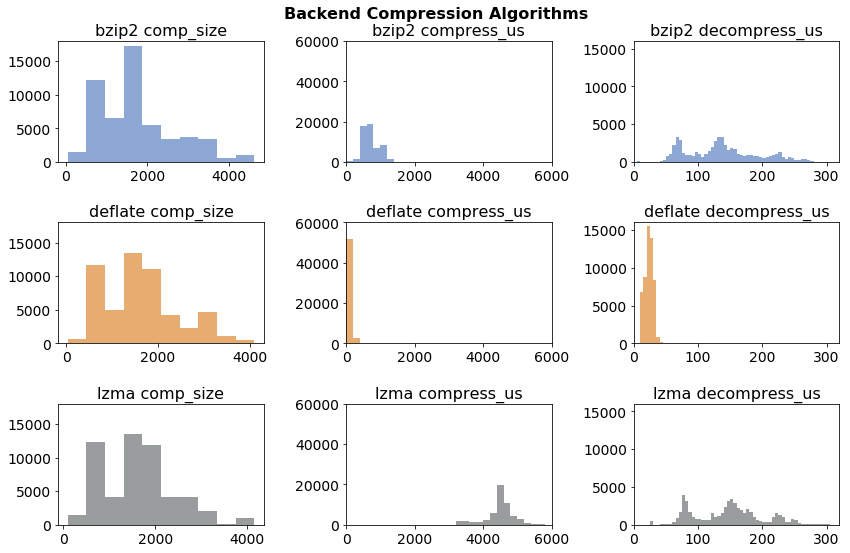

In [393]:
alg_group = 'backend'
chart = 'hist'

compressed_dfs = [
    pd.read_csv(c.path, sep='|', header=None) for c in alg_groups[alg_group]
]

fig, axarr = plt.subplots(len(compressed_dfs), 3, figsize=(14, 8))
metrics = ['comp_size', 'compress_us', 'decompress_us']
i = 0
algs = []
file_names = None
comp_x = range(50)
decomp_x = range(15)
bin_ranges = [None, range(0, 6000, 200), range(0, 320, 5)]

decomp_limit = 0
for c_df in compressed_dfs:
    c_df.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']
    c_df = c_df.groupby('alg')
    
    algs_in_df = dict()
    
    for alg in list(c_df.groups.keys()):
        if alg not in algs_in_df:
            algs.append(alg)
            algs_in_df[alg] =  i
            i += 1
            
        alg_df = c_df.get_group(alg)
        alg_df_len = len(alg_df)
        if alg_df_len > 1:
            compress_idx = [
                np.abs(alg_df.compress_us-alg_df.compress_us.mean())<= 3*alg_df.compress_us.std()]
            decompress_idx = [
                np.abs(alg_df.decompress_us-alg_df.decompress_us.mean())<= 3*alg_df.decompress_us.std()]
            comp_and_decomp = compress_idx and decompress_idx
        else:
            # quick and dirty way to handle the 1 block example
            comp_and_decomp = [[True]]
        comp_and_decomp_len = len([c for c in comp_and_decomp[0] if c])
        print('{}, {}, Removed {} of {} records'.format(alg_df.alg.iloc[0], alg_df.file.iloc[0],
                                                        alg_df_len - comp_and_decomp_len, alg_df_len))
        for m in range(len(metrics)):
            if chart == 'bar':
                axarr[i, m].bar(algs_in_df[alg], alg_df[comp_and_decomp[0]][metrics[m]].mean(),
                             color=bar_codes[comp_codes[alg]])
            elif chart == 'hist':
                axarr[algs_in_df[alg], m].hist(alg_df[comp_and_decomp[0]][metrics[m]],
                      color=bar_codes[comp_codes[alg]], alpha=0.8, bins=bin_ranges[m])
for alg in range(len(algs)): 
    axarr[alg, 0].set_ylim(0, 18000)
    axarr[alg, 1].set_xlim(0, 6000)
    axarr[alg, 1].set_ylim(0, 60000)
    axarr[alg, 2].set_xlim(0, 320)
    axarr[alg, 2].set_ylim(0, 16000)
    for m in range(len(metrics)):
        axarr[alg, m].set_title('{} {}'.format(algs[alg], metrics[m]), fontsize=16)
        #if m == 0:
        #    axarr[alg, m].set_ylabel('bytes')
        #else:
        #    axarr[alg, m].set_ylabel('microseconds')
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.5, wspace=0.4)
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("{} Compression Algorithms".format(alg_group.capitalize()), weight='bold', size=16)

#if chart == 'hist':
#    fig.legend(algs, loc='lower center', ncol=len(algs),  borderaxespad=0.2)

#plt.show()
plt.savefig('compression_algorithms_hist_by_alg_{}.png'.format(alg_group))

# Frontend Hist Combine

lz4, canterbury/alice29.txt, Removed 13 of 55143 records
lzf, canterbury/alice29.txt, Removed 81 of 55143 records
lzo-1a, canterbury/alice29.txt, Removed 478 of 55143 records
lzo1x-1, canterbury/alice29.txt, Removed 53 of 55143 records


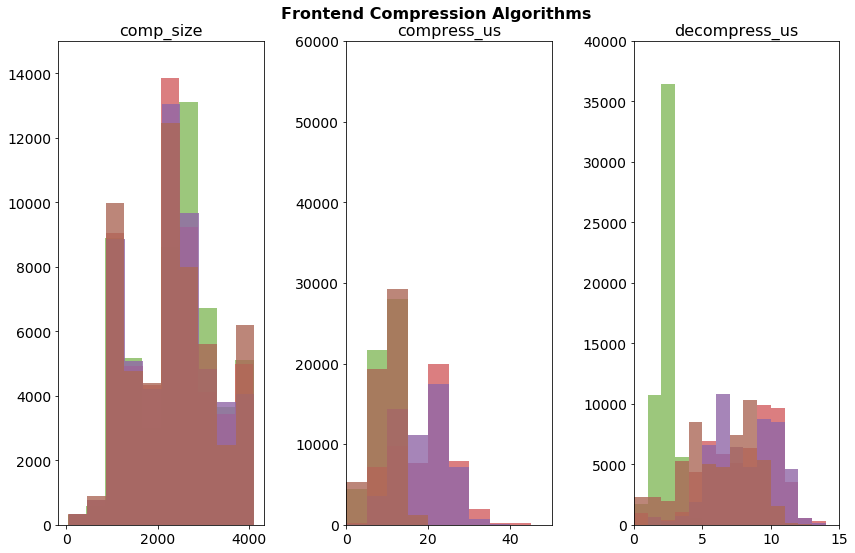

In [396]:
alg_group = 'frontend'
chart = 'hist'

compressed_dfs = [
    pd.read_csv(c.path, sep='|', header=None) for c in alg_groups[alg_group]
]

fig, axarr = plt.subplots(1, 3, figsize=(14, 8))
metrics = ['comp_size', 'compress_us', 'decompress_us']
i = 0
algs = []
file_names = None
comp_x = range(50)
decomp_x = range(15)
bin_ranges = [None, range(0, 50, 5), range(0, 15, 1)]

decomp_limit = 0
for c_df in compressed_dfs:
    c_df.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']
    c_df = c_df.groupby('alg')
    
    algs_in_df = dict()
    
    for alg in list(c_df.groups.keys()):
        if alg not in algs_in_df:
            algs.append(alg)
            algs_in_df[alg] =  i
            i += 1
            
        alg_df = c_df.get_group(alg)
        alg_df_len = len(alg_df)
        if alg_df_len > 1:
            compress_idx = [
                np.abs(alg_df.compress_us-alg_df.compress_us.mean())<= 3*alg_df.compress_us.std()]
            decompress_idx = [
                np.abs(alg_df.decompress_us-alg_df.decompress_us.mean())<= 3*alg_df.decompress_us.std()]
            comp_and_decomp = compress_idx and decompress_idx
        else:
            # quick and dirty way to handle the 1 block example
            comp_and_decomp = [[True]]
        comp_and_decomp_len = len([c for c in comp_and_decomp[0] if c])
        print('{}, {}, Removed {} of {} records'.format(alg_df.alg.iloc[0], alg_df.file.iloc[0],
                                                        alg_df_len - comp_and_decomp_len, alg_df_len))
        for m in range(len(metrics)):
            if chart == 'bar':
                axarr[m].bar(algs_in_df[alg], alg_df[comp_and_decomp[0]][metrics[m]].mean(),
                             color=bar_codes[comp_codes[alg]])
            elif chart == 'hist':
                axarr[m].hist(alg_df[comp_and_decomp[0]][metrics[m]],
                      color=bar_codes[comp_codes[alg]], alpha=0.8, bins=bin_ranges[m])
for alg in range(len(algs)):
    axarr[0].set_ylim(0, 15000)
    axarr[1].set_xlim(0, 50)
    axarr[1].set_ylim(0, 60000)
    axarr[2].set_xlim(0, 15)
    axarr[2].set_ylim(0, 40000)
    for m in range(len(metrics)):
        axarr[m].set_title('{}'.format(metrics[m]), fontsize=16)
        #if m == 0:
        #    axarr[alg, m].set_ylabel('bytes')
        #else:
        #    axarr[alg, m].set_ylabel('microseconds')
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.5, wspace=0.4)
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("{} Compression Algorithms".format(alg_group.capitalize()), weight='bold', size=16)

#if chart == 'hist':
#    fig.legend(algs, loc='lower center', ncol=len(algs),  borderaxespad=0.2)

plt.show()

In [ ]:
def normalize(x):
    return (x - x.mean()) / x.std()
df = compressed_dfs[5]
df.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']
df = df.groupby(['alg', 'file'])
df.groups.keys()
#df.get_group(('bzip2', 'canterbury-large//E.coli'))

In [401]:
comp_path = '../results'
comp_file = 'comp_perf.{}'
comp_file_suffix = [str(i) for i in range(1, 11)]

In [ ]:
alg_group = 'frontend'
chart = 'hist'

compressed_dfs = [
    pd.read_csv(os.path.join(comp_path, comp_file.format(i)),
                sep='|', header=None) for i in comp_file_suffix
]

fig, axarr = plt.subplots(1, 3, figsize=(14, 8))
metrics = ['comp_size', 'compress_us', 'decompress_us']
i = 0
algs = []
file_names = None
comp_x = range(50)
decomp_x = range(15)
bin_ranges = [None, range(0, 50, 5), range(0, 15, 1)]

decomp_limit = 0
for c_df in compressed_dfs:
    c_df.columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']
    c_df = c_df.groupby('alg')
    
    algs_in_df = dict()
    
    for alg in list(c_df.groups.keys()):
        if alg not in algs_in_df:
            algs.append(alg)
            algs_in_df[alg] =  i
            i += 1
            
        alg_df = c_df.get_group(alg)
        alg_df_len = len(alg_df)
        if alg_df_len > 1:
            compress_idx = [
                np.abs(alg_df.compress_us-alg_df.compress_us.mean())<= 3*alg_df.compress_us.std()]
            decompress_idx = [
                np.abs(alg_df.decompress_us-alg_df.decompress_us.mean())<= 3*alg_df.decompress_us.std()]
            comp_and_decomp = compress_idx and decompress_idx
        else:
            # quick and dirty way to handle the 1 block example
            comp_and_decomp = [[True]]
        comp_and_decomp_len = len([c for c in comp_and_decomp[0] if c])
        print('{}, {}, Removed {} of {} records'.format(alg_df.alg.iloc[0], alg_df.file.iloc[0],
                                                        alg_df_len - comp_and_decomp_len, alg_df_len))
        for m in range(len(metrics)):
            if chart == 'bar':
                axarr[m].bar(algs_in_df[alg], alg_df[comp_and_decomp[0]][metrics[m]].mean(),
                             color=bar_codes[comp_codes[alg]])
            elif chart == 'hist':
                axarr[m].hist(alg_df[comp_and_decomp[0]][metrics[m]],
                      color=bar_codes[comp_codes[alg]], alpha=0.8, bins=bin_ranges[m])
for alg in range(len(algs)):
    axarr[0].set_ylim(0, 15000)
    axarr[1].set_xlim(0, 50)
    axarr[1].set_ylim(0, 60000)
    axarr[2].set_xlim(0, 15)
    axarr[2].set_ylim(0, 40000)
    for m in range(len(metrics)):
        axarr[m].set_title('{}'.format(metrics[m]), fontsize=16)
        #if m == 0:
        #    axarr[alg, m].set_ylabel('bytes')
        #else:
        #    axarr[alg, m].set_ylabel('microseconds')
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.5, wspace=0.4)
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("{} Compression Algorithms".format(alg_group.capitalize()), weight='bold', size=16)

#if chart == 'hist':
#    fig.legend(algs, loc='lower center', ncol=len(algs),  borderaxespad=0.2)

plt.show()

In [405]:
comp_columns = ['alg', 'comp_size', 'compress_us', 'decompress_us', 'file', 'block']

In [498]:
compressed_dfs = [
    pd.read_csv(os.path.join(comp_path, comp_file.format(i)),
                sep='|', header=None) for i in comp_file_suffix
]
for cd in compressed_dfs:
    cd.columns = comp_columns

In [496]:
len(compressed_dfs)

10

In [429]:
f_df = pd.concat([df1, df2], keys=['1', '2', '3'])


In [458]:
set(df0.alg)
front_end = ['lzf', 'lz4', 'lzo-1a', 'lzo1x-1']
back_end = ['deflate', 'isal', 'bzip2', 'lzma']

comp_algs = {'frontend': ['lzf', 'lz4', 'lzo-1a', 'lzo1x-1'],
             'backend': ['deflate', 'isal', 'bzip2', 'lzma']}

front_means = {k: [] for k in front_end}
back_means = {k: [] for k in back_end}


deflate, Removed 44 of 55143 records
isal, Removed 542 of 55143 records
bzip2, Removed 111 of 55143 records
lzma, Removed 109 of 55143 records
deflate, Removed 259 of 55143 records
isal, Removed 700 of 55143 records
bzip2, Removed 131 of 55143 records
lzma, Removed 128 of 55143 records
deflate, Removed 60 of 55143 records
isal, Removed 188 of 55143 records
bzip2, Removed 166 of 55143 records
lzma, Removed 158 of 55143 records
deflate, Removed 53 of 55143 records
isal, Removed 467 of 55143 records
bzip2, Removed 156 of 55143 records
lzma, Removed 120 of 55143 records
deflate, Removed 615 of 55143 records
isal, Removed 584 of 55143 records
bzip2, Removed 151 of 55143 records
lzma, Removed 132 of 55143 records
deflate, Removed 260 of 55143 records
isal, Removed 126 of 55143 records
bzip2, Removed 293 of 55143 records
lzma, Removed 230 of 55143 records
deflate, Removed 234 of 55143 records
isal, Removed 75 of 55143 records
bzip2, Removed 127 of 55143 records
lzma, Removed 127 of 55143 reco

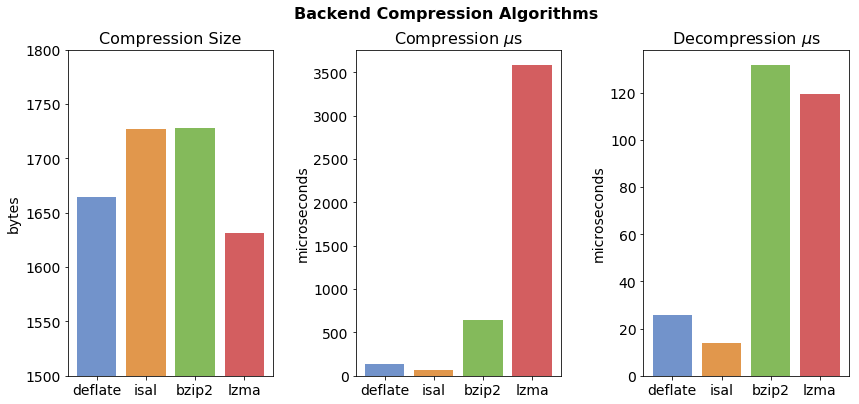

In [508]:
alg_type = 'backend'
metrics = ['comp_size', 'compress_us', 'decompress_us']
size_means = {
    a: [] for a in comp_algs[alg_type]
}
comp_means = {
    a: [] for a in comp_algs[alg_type]
}
decomp_means = {
    a: [] for a in comp_algs[alg_type]
}

for c_df in compressed_dfs:
    c_gp = c_df.groupby('alg')
    
    for alg in alg_types[alg_type]['algs']:
        alg_df = c_gp.get_group(alg)
        compress_idx = [
                np.abs(alg_df.compress_us-alg_df.compress_us.mean())<= 3*alg_df.compress_us.std()]
        decompress_idx = [
                np.abs(alg_df.decompress_us-alg_df.decompress_us.mean())<= 3*alg_df.decompress_us.std()]
        comp_and_decomp = compress_idx and decompress_idx
        comp_and_decomp_len = len([c for c in comp_and_decomp[0] if c])
        print('{}, Removed {} of {} records'.format(alg_df.alg.iloc[0],
                                                    alg_df_len - comp_and_decomp_len, alg_df_len))
        size_means[alg].append(alg_df[comp_and_decomp[0]].comp_size.mean())
        comp_means[alg].append(alg_df[comp_and_decomp[0]].compress_us.mean())
        decomp_means[alg].append(alg_df[comp_and_decomp[0]].decompress_us.mean())
        
fig, axarr = plt.subplots(1, 3, figsize=(14, 6))
for a in range(len(comp_algs[alg_type])):
    alg = comp_algs[alg_type][a]
    axarr[0].bar(a, np.array(size_means[alg]).mean(), color=bar_codes[a])
    axarr[1].bar(a, np.array(comp_means[alg]).mean(), color=bar_codes[a])
    axarr[2].bar(a, np.array(decomp_means[alg]).mean(), color=bar_codes[a])
for m in range(len(metrics)):    
    axarr[m].set_xticks(range(0, len(comp_algs[alg_type])))
    axarr[m].set_xticklabels(comp_algs[alg_type])

axarr[0].set_title('Compression Size', fontsize=16)
axarr[0].set_ylabel('bytes')
axarr[0].set_ylim(1500, 1800)
axarr[1].set_title('Compression $\mu$s', fontsize=16)
axarr[1].set_ylabel('microseconds')
axarr[2].set_title('Decompression $\mu$s', fontsize=16)
axarr[2].set_ylabel('microseconds')
fig.suptitle("{} Compression Algorithms".format(alg_type.capitalize()), weight='bold', size=16)
plt.subplots_adjust(wspace=0.4)
plt.show()

#plt.savefig('compression_algorithms_{}.png'.format(alg_type))

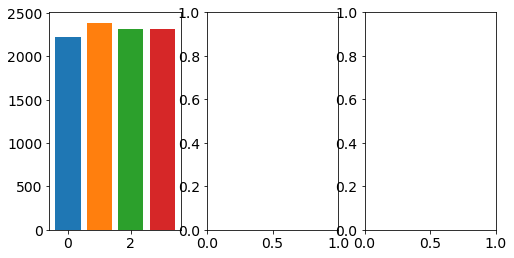

In [477]:
fig, axarr = plt.subplots(1, 3, figsize=(8, 4))
for a in range(len(comp_algs[alg_type])):
    alg = comp_algs[alg_type][a]
    axarr[0].bar(a, np.array(size_means[alg]).mean())

In [461]:
alg_means = {
    a: [] for a in comp_algs[alg_type]
}

In [466]:
df = pd.DataFrame(data=alg_means)

In [467]:
df

,lz4,lzf,lzo-1a,lzo1x-1
0,comp_size 2388.454922 compress_us ...,comp_size 2227.116766 compress_us ...,comp_size 2314.125971 compress_us ...,comp_size 2317.224899 compress_us ...
